# Introdução

Este exercício é baseado no problema descrito no artigo: 

* Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

O dataset foi obtido na plataforma Kaggle via o link:

* https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

# Aquisição, pré-processamento e análise descritiva

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('../../dataset/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

A variável *time* deve ser excluida de $X_{i}$ pois representa o dia da morte do paciente. Ou seja, está diretamente relacionada com a variável de interesse $Y$. 

In [5]:
df = df.drop(columns=['time'])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

O dataset não possui nenhum valor faltante

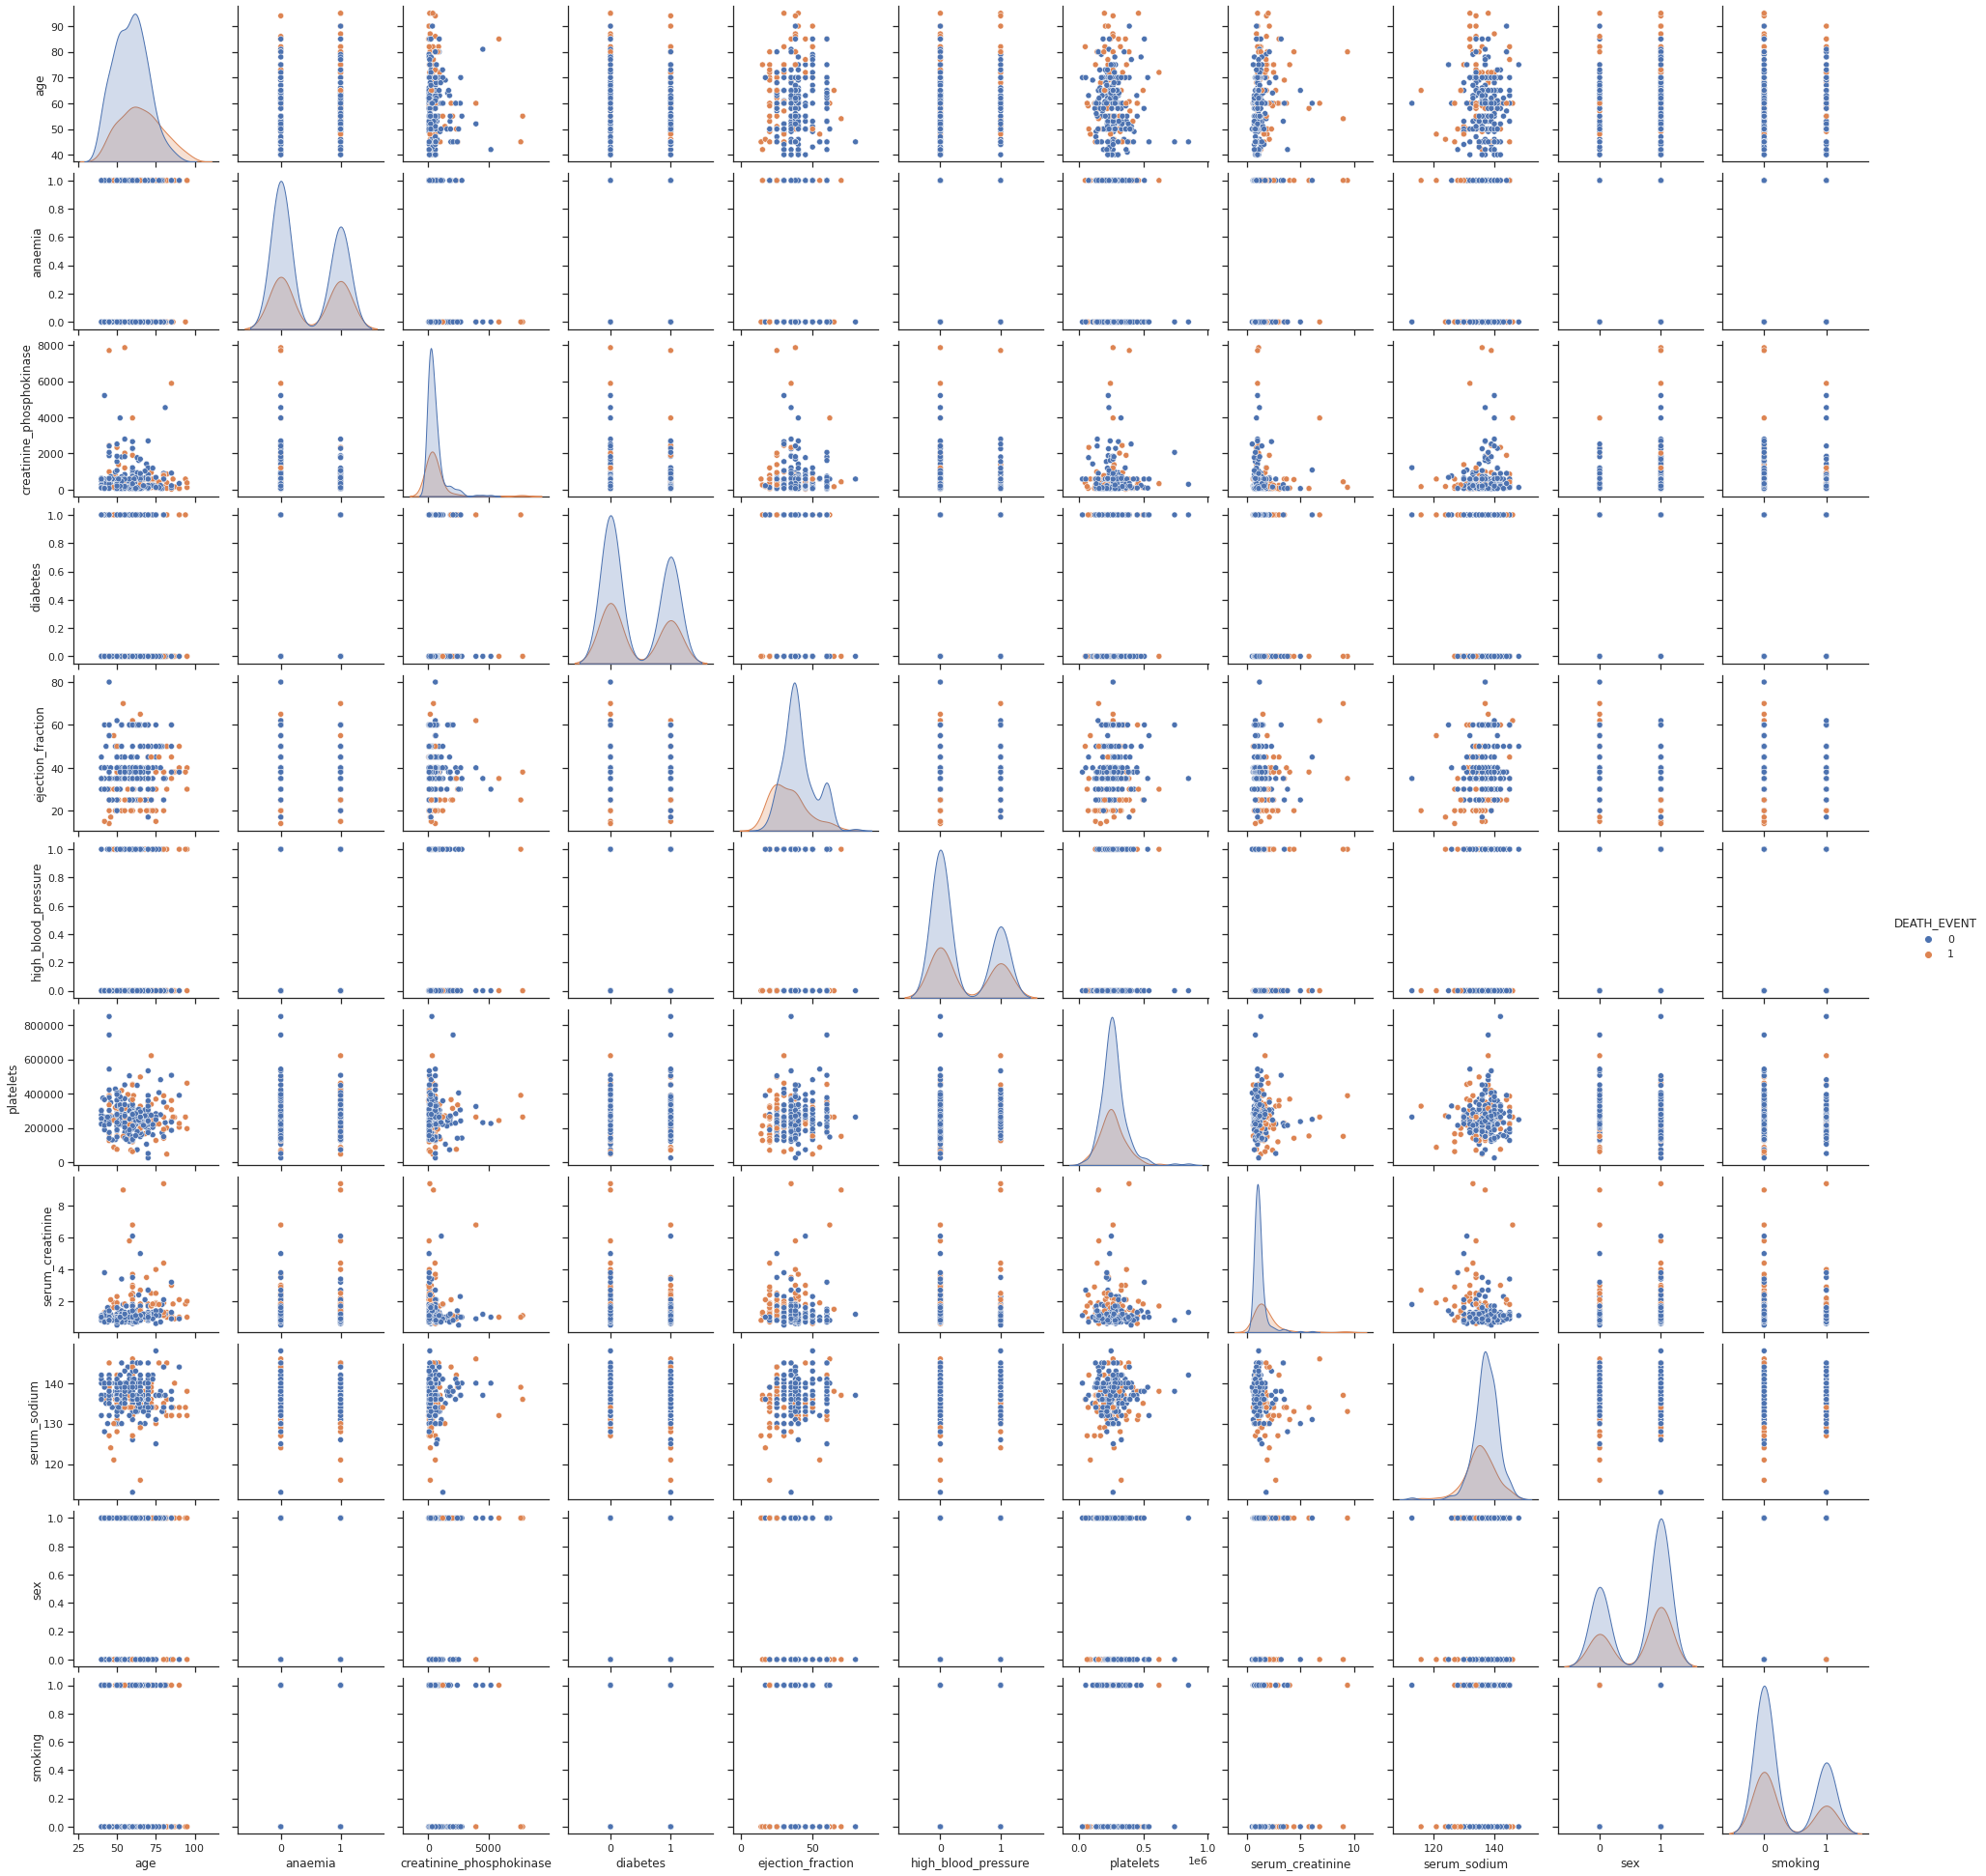

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="DEATH_EVENT")

In [9]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='ejection_fraction', ylabel='serum_creatinine'>

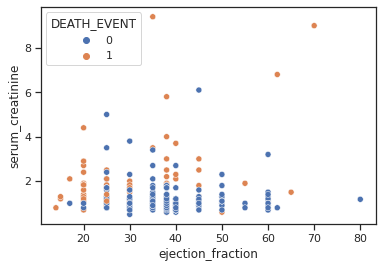

In [13]:
sns.scatterplot(data=df, x="ejection_fraction", y="serum_creatinine", hue="DEATH_EVENT")

Trata-se de um problema onde a variável $Y$ é desbalanceada.

In [15]:
X = df.iloc[:, 0:11]
y = df.iloc[:, 11]

In [40]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), index=X.index, columns=X.columns)

# Criando um modelo usando árvores de decisão e mostrando o overfitting

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import f1_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [43]:
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(f1_score(y_train, y_pred))

[[146   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00        54

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

1.0


In [44]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[47 10]
 [19 23]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        57
           1       0.70      0.55      0.61        42

    accuracy                           0.71        99
   macro avg       0.70      0.69      0.69        99
weighted avg       0.71      0.71      0.70        99

0.6133333333333334


## Mudando a profundidade da árvore de decisão

In [45]:
train_results = []
test_results = []

for i in range(1,50):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    train_results.append(f1_score(y_train, y_pred))
    
    y_pred = clf.predict(X_test)
    test_results.append(f1_score(y_test, y_pred))

<AxesSubplot:>

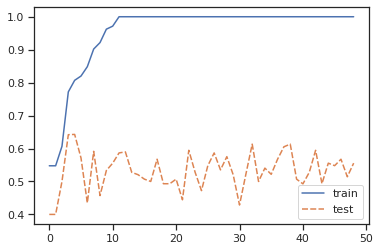

In [46]:
results = pd.DataFrame(data={'train': train_results, 'test': test_results})
sns.lineplot(data=results)

In [75]:
results

,train,test
0,0.547619,0.400000
1,0.547619,0.400000
2,0.606742,0.500000
3,0.771930,0.641975
4,0.807018,0.642857
5,0.820000,0.571429
6,0.848485,0.434783
7,0.901961,0.591549
8,0.921569,0.457143
9,0.962264,0.533333


# Criando um modelo usando RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {"n_estimators" : np.arange(1,3000,100), "max_depth" : [None, 2, 10, 100]}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, grid, cv=3)
rf_random.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 10, 100],
                         'n_estimators': array([  1, 101, 201, 301, 401, 501, 601, 701, 801, 901])})

In [55]:
print(rf_random.best_params_)
print(rf_random.best_estimator_)

{'max_depth': 10, 'n_estimators': 501}
RandomForestClassifier(max_depth=10, n_estimators=501)


In [60]:
results_NB = pd.DataFrame(rf_random.cv_results_['params'])
results_NB['test_score'] = rf_random.cv_results_['mean_test_score']
results_NB['max_depth'] = results_NB['max_depth'].replace(np.nan, 'None', regex=True)

<AxesSubplot:xlabel='n_estimators', ylabel='test_score'>

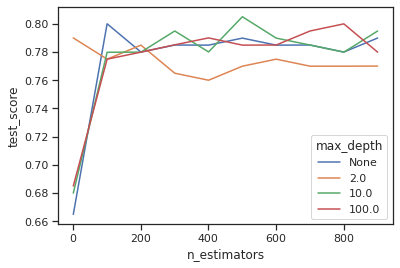

In [61]:
sns.lineplot(data=results_NB, x='n_estimators', y='test_score', hue='max_depth')

In [62]:
clf = RandomForestClassifier(n_estimators=501, max_depth=10)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [63]:
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(f1_score(y_train, y_pred))

[[146   0]
 [  1  53]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       146
           1       1.00      0.98      0.99        54

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

0.9906542056074767


In [64]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[50  7]
 [27 15]]
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        57
           1       0.68      0.36      0.47        42

    accuracy                           0.66        99
   macro avg       0.67      0.62      0.61        99
weighted avg       0.66      0.66      0.63        99

0.46875000000000006




Accuracy:  0.6767676767676768
f1-score: 0.48387096774193544
Precision score:  0.75
Recall score:  0.35714285714285715
MCC:  0.33164167361235863


              precision    recall  f1-score   support

           0       0.66      0.91      0.76        57
           1       0.75      0.36      0.48        42

    accuracy                           0.68        99
   macro avg       0.70      0.63      0.62        99
weighted avg       0.70      0.68      0.65        99





Text(0.5, 1.0, 'Confusion Matrix')

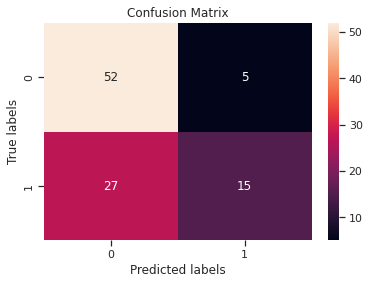

In [65]:
from sklearn.metrics import r2_score,classification_report,f1_score,matthews_corrcoef,recall_score,plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

model_RF = rf_random.best_estimator_
model_RF.fit(X_train,y_train)
predictions_RF =  model_RF.predict(X_test)
print('\n')
print('Accuracy: ', accuracy_score(y_test,predictions_RF))
print('f1-score:', f1_score(y_test, predictions_RF))
print('Precision score: ', precision_score(y_test,predictions_RF))
print('Recall score: ', recall_score(y_test,predictions_RF))
print('MCC: ',matthews_corrcoef(y_test,predictions_RF))
print('\n')
print(classification_report(y_test, predictions_RF))
print('\n')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predictions_RF), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Criação de um modelo usando árvores de decisão

In [66]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

clf = tree.DecisionTreeClassifier()
s = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(clf, X, y, cv=5, scoring=s)
y_pred = cross_val_predict(clf, X, y, cv=5)
print("f1_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

f1_score: 0.45926 (+/- 0.07630)


In [67]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[156  47]
 [ 43  53]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       203
           1       0.53      0.55      0.54        96

    accuracy                           0.70       299
   macro avg       0.66      0.66      0.66       299
weighted avg       0.70      0.70      0.70       299



# Criação de um modelo usando RandomForest

In [68]:
clf = RandomForestClassifier(
        n_estimators=5000, 
        max_depth=None, 
        random_state=0, 
        n_jobs=-1)

s = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(clf, X, y, cv=5, scoring=s)
y_pred = cross_val_predict(clf, X, y, cv=5)
print("f1_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

f1_score: 0.51666 (+/- 0.09673)


In [69]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[173  30]
 [ 51  45]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       203
           1       0.60      0.47      0.53        96

    accuracy                           0.73       299
   macro avg       0.69      0.66      0.67       299
weighted avg       0.72      0.73      0.72       299



# Criando um modelo usando BalancedRandomForestClassifier

In [70]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_estimators=5000, max_depth=None, random_state=0)
s = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(clf, X, y, cv=5, scoring=s)
y_pred = cross_val_predict(clf, X, y, cv=5)
print("f1_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

f1_score: 0.59891 (+/- 0.07176)


In [71]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[146  57]
 [ 31  65]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       203
           1       0.53      0.68      0.60        96

    accuracy                           0.71       299
   macro avg       0.68      0.70      0.68       299
weighted avg       0.73      0.71      0.71       299



Text(0.5, 1.0, 'Confusion Matrix')

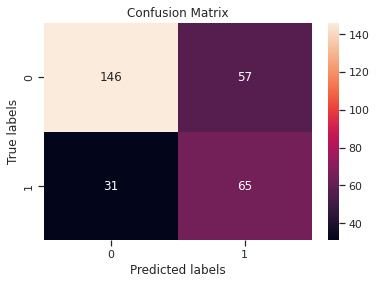

In [73]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y, y_pred), annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Criando um modelo usando KNN

Best estimator: 1
    estimators     score
0          1.0  0.320000
1          2.0  0.114444
2          3.0  0.236667
3          4.0  0.113333
4          5.0  0.194444
5          6.0  0.061111
6          7.0  0.144444
7          8.0  0.093333
8          9.0  0.124444
9         10.0  0.073333
10        11.0  0.134444
11        12.0  0.094444
12        13.0  0.134444
13        14.0  0.074444
14        15.0  0.094444
15        16.0  0.083333
16        17.0  0.114444
17        18.0  0.073333
18        19.0  0.073333
19        20.0  0.041111
20        21.0  0.062222
21        22.0  0.042222
22        23.0  0.042222
23        24.0  0.020000
24        25.0  0.020000
25        26.0  0.020000
26        27.0  0.020000
27        28.0  0.010000
28        29.0  0.010000


<AxesSubplot:xlabel='estimators', ylabel='score'>

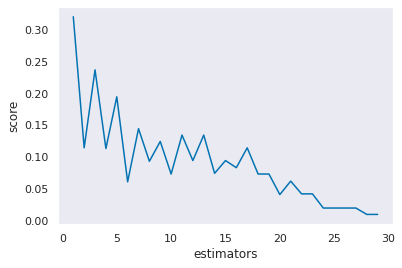

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_val_predict

# loop to find best number of estimators
result = []
best_score = 0
best_estimator = 0

for i in range(1, 30):
    modelK = KNeighborsClassifier(n_neighbors=i)
    modelK.fit(X, y)
    s = make_scorer(recall_score, pos_label=1)
    scores = cross_val_score(modelK, X, y, cv=10, scoring=s)
    if (scores.mean() > best_score):
        best_estimator = i
        best_score = scores.mean()
    result.append((i, scores.mean()))
    
# converting result into dataframe
estimators = np.array(result)[:,0]
score = np.array(result)[:,1]
d = {'estimators': estimators, 'score': score}
df_scores = pd.DataFrame(d)
print(f'Best estimator: {best_estimator}')
print(df_scores)

sns.set_theme(style="dark")
sns.set_palette("colorblind")
sns.lineplot(
        data=df_scores,
        x="estimators", 
        y="score"
    )

# Combinando todos os classificadores

In [76]:
from sklearn.ensemble import VotingClassifier

knn = KNeighborsClassifier(n_neighbors=1)
brf = BalancedRandomForestClassifier(n_estimators=5000, max_depth=None, random_state=0)
rf  = RandomForestClassifier(n_estimators=5000, max_depth=None, random_state=0, n_jobs=-1)
tre = tree.DecisionTreeClassifier(max_depth=3)

voting = VotingClassifier(estimators=[('knn', knn), ('brf', brf), ('rf', rf), ('tre', tre)], voting='hard')

s = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(voting, X, y, cv=5, scoring=s)
y_pred = cross_val_predict(voting, X, y, cv=5)
print("f1_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

f1_score: 0.50068 (+/- 0.09100)


In [77]:
for clf in (knn, brf, rf, tre, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

KNeighborsClassifier 0.3225806451612903
BalancedRandomForestClassifier 0.6888888888888889
RandomForestClassifier 0.48387096774193544
DecisionTreeClassifier 0.5
VotingClassifier 0.4333333333333334


# Usando Smote para fazer oversampling do conjunto de treinamento

In [79]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

sm = SMOTE(random_state=1234)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(X_train_res.shape)
print(y_train_res.shape)
print(Counter(y_train_res))

(292, 11)
(292,)
Counter({0: 146, 1: 146})


In [80]:
grid = {"n_estimators" : np.arange(1,3000,100), "max_depth" : [None, 2, 10, 100]}
rf = RandomForestClassifier()
rf_random = GridSearchCV(rf, grid, cv=3)
rf_random.fit(X_train_res,y_train_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 2, 10, 100],
                         'n_estimators': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101,
       2201, 2301, 2401, 2501, 2601, 2701, 2801, 2901])})

In [81]:
print(rf_random.best_params_)
print(rf_random.best_estimator_)

{'max_depth': 100, 'n_estimators': 2101}
RandomForestClassifier(max_depth=100, n_estimators=2101)


In [83]:
results_NB = pd.DataFrame(rf_random.cv_results_['params'])
results_NB['test_score'] = rf_random.cv_results_['mean_test_score']
results_NB['max_depth'] = results_NB['max_depth'].replace(np.nan, 'None', regex=True)

<AxesSubplot:xlabel='n_estimators', ylabel='test_score'>

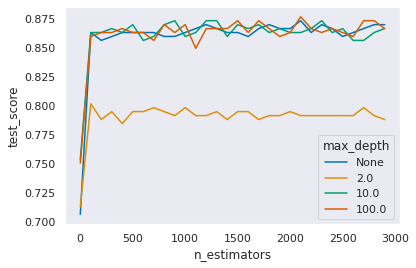

In [84]:
sns.lineplot(data=results_NB, x='n_estimators', y='test_score', hue='max_depth')

In [82]:
rf = rf_random.best_estimator_
rf.fit(X_train_res,y_train_res)
y_pred = rf.predict(X_test)
print(rf.__class__.__name__, f1_score(y_test, y_pred))

RandomForestClassifier 0.5142857142857143


# Bagging classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

s = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(bag_clf, X, y, cv=5, scoring=s)
y_pred = cross_val_predict(bag_clf, X, y, cv=5)
print("f1_score: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std()))

f1_score: 0.59592 (+/- 0.04140)


In [87]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[170  33]
 [ 44  52]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       203
           1       0.61      0.54      0.57        96

    accuracy                           0.74       299
   macro avg       0.70      0.69      0.69       299
weighted avg       0.74      0.74      0.74       299

